In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-09-05 15:09:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 209.85.146.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  97.0MB/s    in 2.0s    

2020-09-05 15:09:22 (97.0 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-09-05 15:09:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to:

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')


rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print('total training rock images:', len(rock_files))
print('total training paper images:', len(paper_files))
print('total training scissors images:', len(scissors_files))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


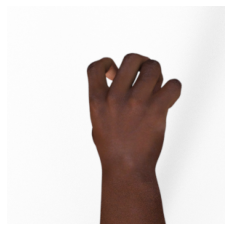

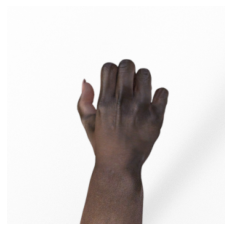

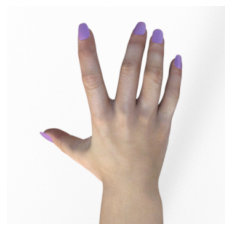

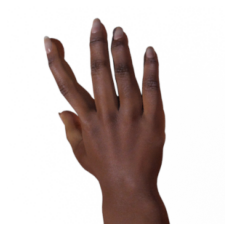

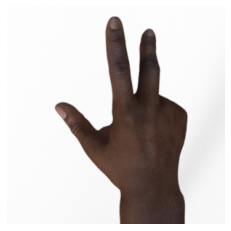

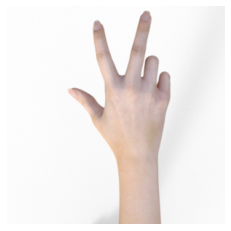

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_filesm[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [9]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),     

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')                          
])

model.summary()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

In [11]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps = 2  
)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 164s 8s/step - loss: 1.4803 - accuracy: 0.3429 - val_loss: 1.0951 - val_accuracy: 0.3214
Epoch 2/25
20/20 [==============================] - 166s 8s/step - loss: 1.2323 - accuracy: 0.3563 - val_loss: 1.0934 - val_accuracy: 0.4603
Epoch 3/25
20/20 [==============================] - 162s 8s/step - loss: 1.1401 - accuracy: 0.4044 - val_loss: 1.0583 - val_accuracy: 0.5516
Epoch 4/25
20/20 [==============================] - 162s 8s/step - loss: 1.0061 - accuracy: 0.4944 - val_loss: 0.8354 - val_accuracy: 0.7619
Epoch 5/25
20/20 [==============================] - 162s 8s/step - loss: 0.9862 - accuracy: 0.5786 - val_loss: 0.7187 - val_accuracy: 0.8968
Epoch 6/25
20/20 [==============================] - 165s 8s/step - loss: 0.8427 - accuracy: 0.6306 - val_loss: 0.8233 - val_accuracy: 0.6667
Epoch 7/25
20/20 [==============================] - 161s 8s/step - loss: 0.8051 - accuracy: 0.6349 - val_loss: 0.2582 - val_accuracy: 0.9881
Epoch 8/25
20

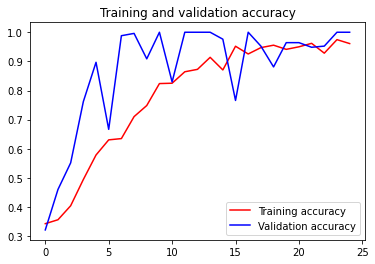

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

#Exercise 4 - Multi-class classifier
Now that you've explored the concepts behind going from binary classification to multi class classification, it's time for another Exercise. In this one you'll use the Sign Language dataset from https://www.kaggle.com/datamunge/sign-language-mnist, and attempt to build a multi-class classifier to recognize sign language!

Let's build a multi-class classifier to recognize sign language!

In [ ]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        my_reader = csv.reader(training_file, delimiter=',')
        skip_first_line = True
        images_list = []
        labels_list = []
        for row in my_reader:
            if skip_first_line is True:
                skip_first_line = False
            else:
                labels_list.append(row[0])
                images_list.append(np.array_split(row[1:785], 28))
                
        images = np.array(images_list).astype('float')
        labels = np.array(labels_list).astype('float')
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3)# Your Code Here
testing_images = np.expand_dims(testing_images, axis = 3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
        rescale = (1./255.),
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
        rescale = (1./255.)
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32)
validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32)

In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(26,activation='softmax')  
])

#model.summary()
    
# Compile Model. 
model.compile(
    # Your Code Here
        loss = 'sparse_categorical_crossentropy', 
        optimizer = 'adam',
        metrics = ['accuracy']
    )

# Train the Model
batch_size = 32
history = model.fit_generator(
    # Your Code Here (set 'epochs' = 2)
        train_generator,
        epochs = 2,
        steps_per_epoch = len(training_images) / batch_size,
        validation_data = validation_generator,
        verbose = 0,
        validation_steps = len(testing_images)/batch_size
    )

model.evaluate(testing_images, testing_labels, verbose=0)


In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()